In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
cancer=load_breast_cancer()

In [ ]:
x=pd.DataFrame(cancer.data,columns=cancer.feature_names)
y=pd.Series(cancer.target)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=3,random_state=42)
model.fit(x_train,y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
y_pred=model.predict(x_test)
acc=accuracy_score(y_test,y_pred)

print("Accuracy:", acc)
print("\nConfusion Matrix:",confusion_matrix(y_test,y_pred))
print("\nClassification Report:",classification_report(y_test,y_pred))

Accuracy: 0.956140350877193

Confusion Matrix: [[40  3]
 [ 2 69]]

Classification Report:               precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



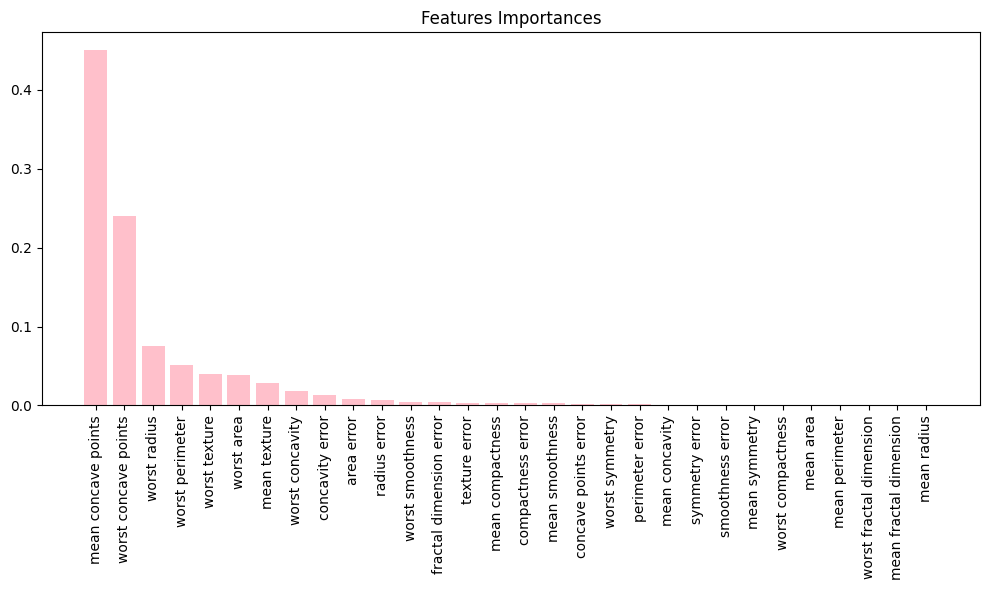

In [ ]:
importance=model.feature_importances_
indices=np.argsort(importance)[::-1]
features=x.columns

plt.figure(figsize=(10,6))
plt.title("Features Importances")
plt.bar(range(x.shape[1]),importance[indices],color="pink",align='center')
plt.xticks(range(x.shape[1]),features[indices],rotation=90)
plt.tight_layout()